In [1]:
#Importamos la libreria a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

        Se realizará un analisis más profundo en el dataset de indicadores de educación para asi evaluar las diferentes series dentro de este csv y a su vez evaluar los flujos migratorios.

In [2]:
 #Abrimos nuestro dataset que contiene los diferentes indicadores de educación
datos_educacion = pd.read_csv('indicador_educacion_normalizado.csv') 

In [3]:
#chequeamos como viene la data
datos_educacion.head()

,Country Name,Country Code,Series,1990,1995,2000,2005,2010,2015,2020,cod
0,afghanistan,AFG,Government expenditure on education as % of GD...,0.0,0.0,0.0,0.0,3.47945,3.2558,0.0,1
1,afghanistan,AFG,"Out-of-school children of primary school age, ...",0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,1
2,afghanistan,AFG,Proportion of teachers with the minimum requir...,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,1
3,afghanistan,AFG,Proportion of teachers with the minimum requir...,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,1
4,afghanistan,AFG,Proportion of teachers with the minimum requir...,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,1


In [4]:
#importamos el dataset que contiene el stock de origen de los emigrantes 
emigrantes = pd.read_csv('L-Total_emigrantes_ORIGEN_normal.csv')

In [5]:
#Importamos el dataset que contiene el stock de inmigrantes y su destino
inmigrantes = pd.read_csv('L-Total_inmigrantes_DESTINO_normal.csv')

Del dataset de indicadores de educacion dropeamos las columnas que no son necesarias para el analisis

In [6]:
datos_educacion.drop(columns={'Country Code'}, inplace=True)

In [7]:
datos_educacion.drop(columns={'cod'},inplace=True)

In [8]:
datos_educacion.head()

,Country Name,Series,1990,1995,2000,2005,2010,2015,2020
0,afghanistan,Government expenditure on education as % of GD...,0.0,0.0,0.0,0.0,3.47945,3.2558,0.0
1,afghanistan,"Out-of-school children of primary school age, ...",0.0,0.0,0.0,0.0,0.00000,0.0000,0.0
2,afghanistan,Proportion of teachers with the minimum requir...,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0
3,afghanistan,Proportion of teachers with the minimum requir...,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0
4,afghanistan,Proportion of teachers with the minimum requir...,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0


Hacemos un pivoteo en nuestro dataframe de modo que todos los indicadores queden por columna y los años en una sola columna

In [9]:
data_transpuesta = (
    datos_educacion.set_index(["Country Name", "Series"])
    .rename_axis("year", axis=1)
    .stack()
    .unstack(1)
    .sort_values(['Country Name','year'])
    .reset_index()
    .rename_axis(None, axis=1)
    .rename_axis("id")
)

In [12]:
##Vizualizando los diferentes indicadores de educación 
for item in data_transpuesta.columns:
    print(item,end='___')

Country Name___year___Adult illiterate population, 15+ years, both sexes (number)___All staff compensation as % of total expenditure in lower secondary public institutions (%)___Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary___Barro-Lee: Percentage of population age 15+ with no education___Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary___Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)___Barro-Lee: Percentage of population age 20-24 with no education___Barro-Lee: Percentage of population age 25-29 with no education___Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary___Barro-Lee: Percentage of population age 40-44 with no education___Capital expenditure as % of total expenditure in public institutions (%)___Completion rate, lower secondary education, rural, both sexes (%)___Current expenditur

In [13]:
""""haciendo un filtro por los distintos años en el dataframe para evaluar año a año los diferentes indicadores de educación por 
pais"""
filtro1990 = data_transpuesta[(data_transpuesta['year'] == '1990')] 
filtro1995 = data_transpuesta[(data_transpuesta['year'] == '1995')]
filtro2000 = data_transpuesta[(data_transpuesta['year'] == '2000')]
filtro2005 = data_transpuesta[(data_transpuesta['year'] == '2005')]
filtro2010 = data_transpuesta[(data_transpuesta['year'] == '2010')]
filtro2015 = data_transpuesta[(data_transpuesta['year'] == '2015')]
filtro2020 = data_transpuesta[(data_transpuesta['year'] == '2020')]

                        Filtrando por porcentaje de la población mayor de 15 años sin educación

In [14]:
#filtro1990
total_1990 = (
    filtro1990
    .groupby('Country Name')['Barro-Lee: Percentage of population age 15+ with no education']
    .mean()
    .reset_index()
    .sort_values(by='Barro-Lee: Percentage of population age 15+ with no education',ascending=False)
)

In [15]:
total_1990.head(5)   #top 5 de los paises con poblacion mayor con mas de 15 años que no tienen educacion en el año 1990

,Country Name,Barro-Lee: Percentage of population age 15+ with no education
214,"yemen, rep.",84.04
142,niger,83.67
121,mali,82.71
70,"gambia, the",79.79
133,mozambique,77.00


In [16]:
#Filtro 2010
total_2010 = (
    filtro2010
    .groupby('Country Name')['Barro-Lee: Percentage of population age 15+ with no education']
    .mean()
    .reset_index()
    .sort_values(by='Barro-Lee: Percentage of population age 15+ with no education',ascending=False)
)

In [17]:
total_2010.head()

,Country Name,Barro-Lee: Percentage of population age 15+ with no education
121,mali,74.57
142,niger,72.85
133,mozambique,68.14
70,"gambia, the",61.76
166,senegal,58.58


se puede apreciar como este indice de personas sin educación ha venido dismuyendo en el caso de Yemen desaparece de nuestro top 5 desde 1990 hasta el 2010, veremos a continuación los flujos de migrantes para esta región 

In [18]:
'yemen' in emigrantes['Region, development group, country or area'].unique()


True

In [19]:
#filtramos por el pais Yemen
filtro_yemen = emigrantes[(emigrantes['Region, development group, country or area'] == 'yemen')]

In [20]:
#hacemos una visualización completa de el filtro de Yemen
filtro_yemen 

,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
110,yemen,887,455492,486249,529396,628869,876383,1095240,1301166


C:\Users\USER\AppData\Local\Temp\ipykernel_17304\620711068.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


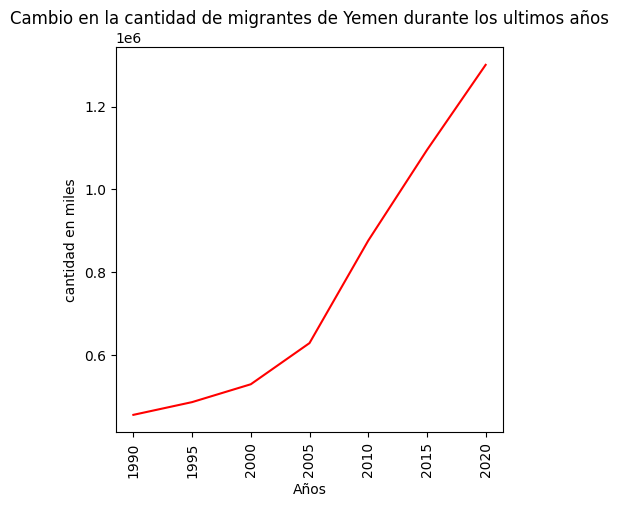

In [22]:
#Ploteamos el flujo migratorio en Yemen 
fig, ax = plt.subplots(figsize=(5,5))

yemen = filtro_yemen.loc[filtro_yemen['Region, development group, country or area'] == 'yemen', '1990':'2020']
ax.plot(yemen.values[0], color='red')
ax.set_title('Cambio en la cantidad de migrantes de Yemen durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('cantidad en miles')
plt.show()

Como era de esperarse el flujo de migrantes del la república de Yemen ha venido en un gran aumento y puede ser una de las razones por las que cada vez hay menos cantidad de personas con más de 15 años sin educación ya que cada vez hay menos datos para este indicador, una de las razones de estos flujos migratorios para dicha region, se debe a que este pais a estado involucrado en la guerra y en la actualidad, se encuentra con una de las peores crisis humanitarias en el mundo.

                    Filtrando por la poblacion con mas de 15 años que es analfabeta

In [23]:
#filtramos el año 1990
serie2_1990 = (
    filtro1990
    .groupby('Country Name')['Adult illiterate population, 15+ years, both sexes (number)']
    .mean()
    .reset_index()
    .sort_values(by='Adult illiterate population, 15+ years, both sexes (number)',ascending=False)
)

In [24]:
serie2_1990.head(10) #visualizamos un top10

,Country Name,"Adult illiterate population, 15+ years, both sexes (number)"
40,china,186795440.0
89,indonesia,21190952.0
197,turkey,7299870.0
126,mexico,6338468.0
154,philippines,2348089.0
30,burundi,1771478.0
215,zambia,1479284.0
209,"venezuela, rb",1239129.0
56,ecuador,736412.0
170,singapore,259191.0


In [25]:
#filtramos para el año 2000
serie2_2000 = (   
    filtro2000
    .groupby('Country Name')['Adult illiterate population, 15+ years, both sexes (number)']
    .mean()
    .reset_index()
    .sort_values(by='Adult illiterate population, 15+ years, both sexes (number)',ascending=False)
)

In [254]:
##vizualizamos el top 10 para este filtro 
serie2_2000.head(10)

,Country Name,"Adult illiterate population, 15+ years, both sexes (number)"
40,china,88203088.0
26,brazil,16695339.0
126,mexico,6148125.0
184,sudan,5852992.0
210,viet nam,5371206.0
73,ghana,4651021.0
46,cote d'ivoire,4607380.0
154,philippines,3551095.0
191,thailand,3513448.0
91,iraq,3476850.0


No seguire evaluando tan a fondo este indicador porque ahora no me aporta mucho pasamos a otro...

            filtrando por numero de usuarios que usan internet por cada 100 personas

In [264]:
#se hace un filtro para este indicador en el año 1990
serie3_1990 = (
    filtro1990
    .groupby('Country Name')['Internet users (per 100 people)']
    .mean()
    .reset_index()
    .sort_values(by='Internet users (per 100 people)',ascending=False)
)

In [274]:
serie3_1990.head(10)

,Country Name,Internet users (per 100 people)
205,united states,0.784729
146,norway,0.707299
187,switzerland,0.595714
10,australia,0.585095
186,sweden,0.584192
66,finland,0.401088
34,canada,0.361000
138,netherlands,0.334387
11,austria,0.130369
72,germany,0.125892


Como es de esperar hay más números de usuarios en estos paises de primer mundo, veamos que tan atrativo es para el flujo de inmigrantes en este top de paises

In [27]:
#Filtro regiones del top10 de la cantidad de inmigrantes por pais 
filtro_regiones = inmigrantes[(inmigrantes['Region, development group, country or area'] == 'united states of america') |
                             (inmigrantes['Region, development group, country or area'] == 'norway') |
                             (inmigrantes['Region, development group, country or area'] == 'australia') |
                             (inmigrantes['Region, development group, country or area'] == 'switzerland') |
                             (inmigrantes['Region, development group, country or area'] == 'sweden') |
                             (inmigrantes['Region, development group, country or area'] == 'canada') |
                             (inmigrantes['Region, development group, country or area'] == 'finland') |
                                (inmigrantes['Region, development group, country or area'] == 'netherlands') |
                               (inmigrantes['Region, development group, country or area'] == 'austria') |
                                (inmigrantes['Region, development group, country or area'] == 'germany')]

In [28]:
filtro_regiones #vizualizamos

,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
122,finland,246,63255,99729,136203,192169,228481,314856,386052
128,norway,578,192587,233302,292440,361144,524601,746375,852238
129,sweden,752,788767,936022,1003798,1125790,1337214,1602522,2003908
147,austria,40,793239,894893,996547,1127164,1274901,1483123,1738183
150,germany,276,5936181,7464406,8992631,9402447,9812263,10220418,15762457
154,netherlands,528,1182263,1346164,1556337,1736127,1832510,1996318,2358333
155,switzerland,756,1392282,1478829,1570756,1805437,2075182,2258196,2491249
207,canada,124,4333318,4864778,5511914,6078985,6761226,7428657,8049323
210,united states of america,840,23251026,28451053,34814053,39258293,44183643,48178877,50632836
211,australia,36,3955213,4153330,4386250,4878030,5882980,6729730,7685860


En este top 10 podemos apreciar hubo un gran aumento en el numero de inmigrantes por los países filtrados quizas el uso del internet no influya en las decisiones de los inmigrantes pero al ser paises donde la cantidad de personas que usan internet es mucho mayor a los paises no tan progresados por obvias razones los inmigrantes se van a estos paises con mas progreso y mejor calidad en los servicios diarios.

Se hara diferentes poteos para ver el cambio en la cantidad de inmigrantes durante los años mencionados en el dataframe

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\626634378.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


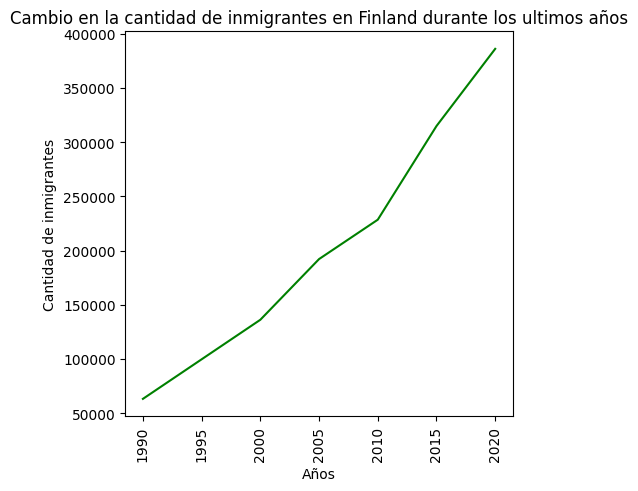

In [29]:
#Ploteo para el flujo de inmigrantes en Finlandia
fig, ax = plt.subplots(figsize=(5,5))

finland = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'finland', '1990':'2020']
ax.plot(finland.values[0], color='green')
ax.set_title('Cambio en la cantidad de inmigrantes en Finland durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad de inmigrantes')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\3738418622.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


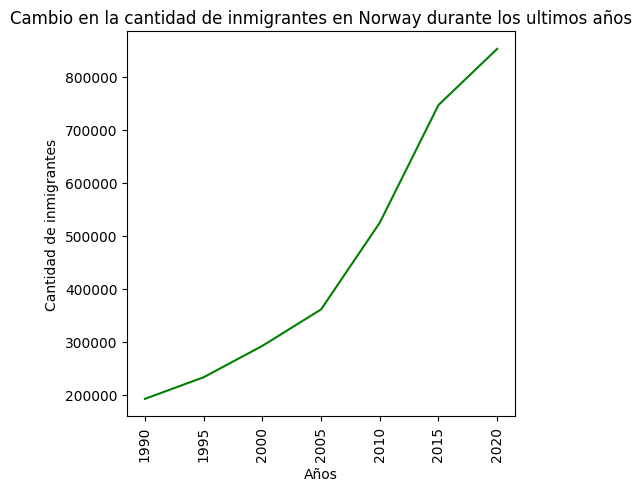

In [30]:
#Ploteo para el flujo de inmigrantes en Norway
fig, ax = plt.subplots(figsize=(5,5))

norway = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'norway', '1990':'2020']
ax.plot(norway.values[0], color='green')
ax.set_title('Cambio en la cantidad de inmigrantes en Norway durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad de inmigrantes')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\1013429213.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


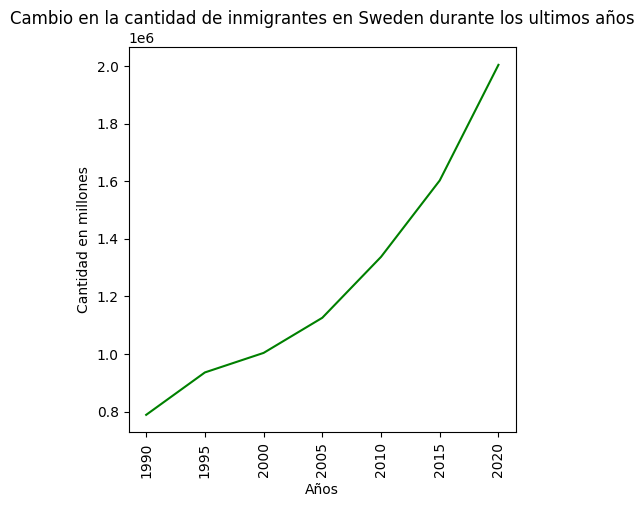

In [32]:
#ploteo para el flujo de inmigrantes en Sweden
fig, ax = plt.subplots(figsize=(5,5))

sweden = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'sweden', '1990':'2020']
ax.plot(sweden.values[0], color='green')
ax.set_title('Cambio en la cantidad de inmigrantes en Sweden durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\350309562.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


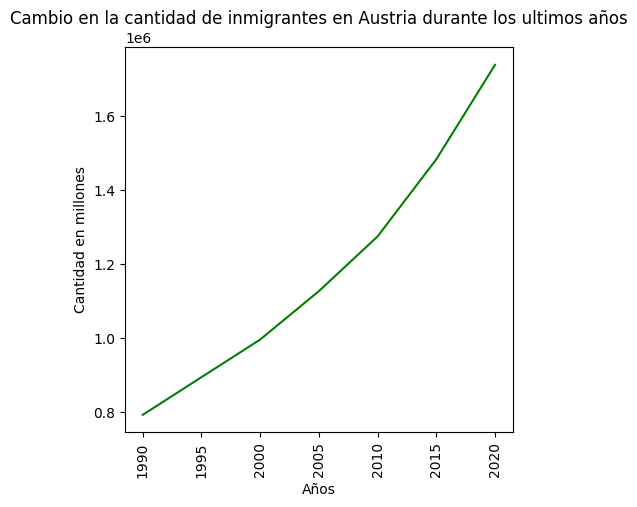

In [33]:
#Ploteo para el flujo de inmigrantes en Austria
fig, ax = plt.subplots(figsize=(5,5))

austria = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'austria', '1990':'2020']
ax.plot(austria.values[0], color='green')
ax.set_title('Cambio en la cantidad de inmigrantes en Austria durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\917484790.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


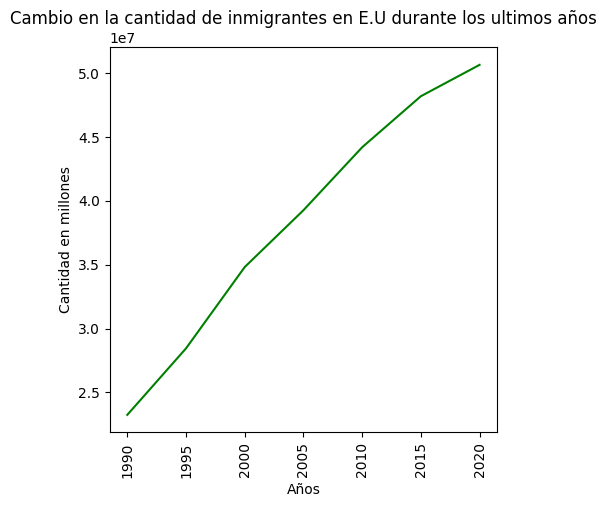

In [34]:
#ploteo para el flujo de inmigrantes en Estados Unidos
fig, ax = plt.subplots(figsize=(5,5))

eu = filtro_regiones.loc[filtro_regiones['Region, development group, country or area'] == 'united states of america', '1990':'2020']
ax.plot(eu.values[0], color='green')
ax.set_title('Cambio en la cantidad de inmigrantes en E.U durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

Como es de esperarse el stock de inmigrantes en estos paises ha venido en gran aumento, punto muy bueno para evaluar en un modelo de machine learning y hacer una aproximaciones en la predicción acerca de la cantidad de migrantes en los proximos años.


In [267]:
serie3_2010 = (
    filtro2010
    .groupby('Country Name')['Internet users (per 100 people)']
    .mean()
    .reset_index()
    .sort_values(by='Internet users (per 100 people)',ascending=False)
)

In [269]:
serie3_2000 = (
    filtro2000
    .groupby('Country Name')['Internet users (per 100 people)']
    .mean()
    .reset_index()
    .sort_values(by='Internet users (per 100 people)',ascending=False)
)

In [270]:
serie3_2000.head()

,Country Name,Internet users (per 100 people)
146,norway,52.000000
34,canada,51.300000
163,san marino,48.799495
140,new zealand,47.379557
187,switzerland,47.100000


In [268]:
serie3_2010.head()

,Country Name,Internet users (per 100 people)
87,iceland,93.39
146,norway,93.39
138,netherlands,90.72
115,luxembourg,90.62
186,sweden,90.00


            Filtrando por gasto de capital como % del gasto total en instituciones públicas (%)

In [35]:
#Filtro para el año 1990 de este indicador
serie4_1990 = (
    filtro1990
    .groupby('Country Name')['Capital expenditure as % of total expenditure in public institutions (%)']
    .mean()
    .reset_index()
    .sort_values(by='Capital expenditure as % of total expenditure in public institutions (%)',ascending=False)
)

In [36]:
serie4_1990.head()

,Country Name,Capital expenditure as % of total expenditure in public institutions (%)
0,afghanistan,0.0
149,palau,0.0
138,netherlands,0.0
139,new caledonia,0.0
140,new zealand,0.0


In [291]:
serie4_1990['Capital expenditure as % of total expenditure in public institutions (%)'].unique()

array([0.])

In [292]:
## esta columna esta sin datos obtaremos por dropearla

data_transpuesta.drop(columns={'Capital expenditure as % of total expenditure in public institutions (%)'}, inplace=True)

                    filtrando por niños sin escolarizar en edad de asistir a la escuela primaria, ambos sexos (número)

In [293]:
#filtro del indicador trabajado para el año 1990
serie5_1990 = (
    filtro1990
    .groupby('Country Name')['Out-of-school children of primary school age, both sexes (number)']
    .mean()
    .reset_index()
    .sort_values(by='Out-of-school children of primary school age, both sexes (number)',ascending=False)
)

In [298]:
serie5_1990.head(10) #vizualizamos

,Country Name,"Out-of-school children of primary school age, both sexes (number)"
88,india,24350653.0
15,bangladesh,3573153.0
40,china,3030952.0
190,"tanzania, united republic of",2296785.0
132,morocco,1410722.0
133,mozambique,1020915.0
142,niger,1014531.0
89,indonesia,986292.0
80,guinea,742623.0
90,"iran, islamic rep.",718115.0


In [299]:
#filtro para el año 2000
serie5_2000 = (
    filtro2000
    .groupby('Country Name')['Out-of-school children of primary school age, both sexes (number)']
    .mean()
    .reset_index()
    .sort_values(by='Out-of-school children of primary school age, both sexes (number)',ascending=False)
)

In [300]:
serie5_2000.head() #chequeamos

,Country Name,"Out-of-school children of primary school age, both sexes (number)"
88,india,19457444.0
143,nigeria,6563054.0
63,ethiopia,6382724.0
190,"tanzania, united republic of",2955790.0
100,kenya,1928475.0


In [37]:
#filtramos para el año 2010
serie5_2010 = (
    filtro2010
    .groupby('Country Name')['Out-of-school children of primary school age, both sexes (number)']
    .mean()
    .reset_index()
    .sort_values(by='Out-of-school children of primary school age, both sexes (number)',ascending=False)
)

In [38]:
serie5_2010 = serie5_2010.head(10) #agrramos un top 10 para plotearlo

Hacemos un grafico de torta para ver hacer la vizualizacion y ver estos paises donde muy pocos niños asisten a la escuela 

<AxesSubplot: ylabel='Out-of-school children of primary school age, both sexes (number)'>

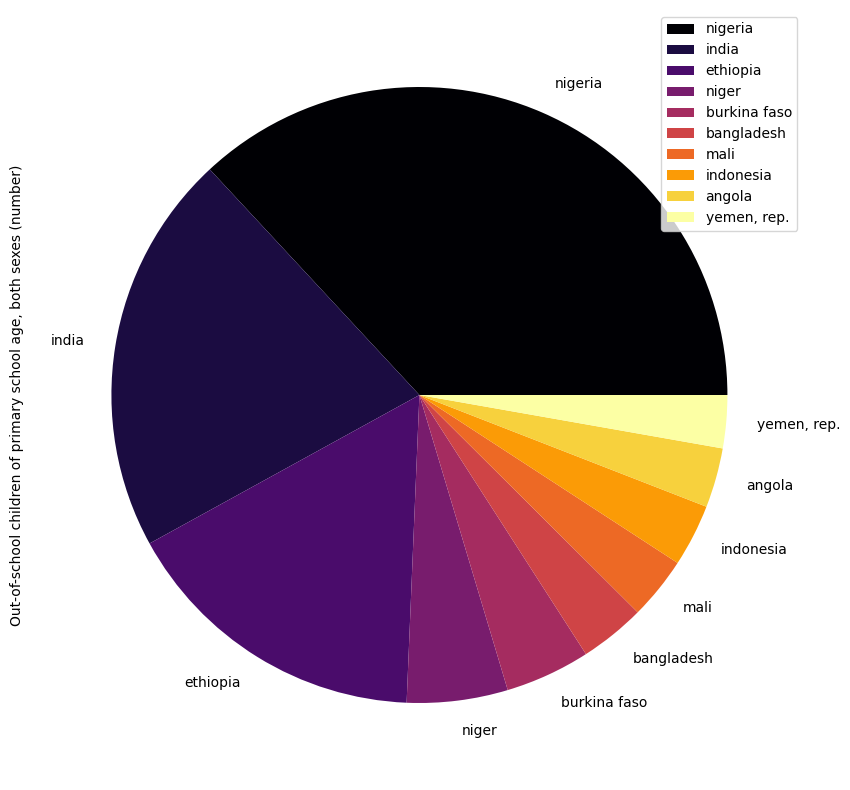

In [323]:
serie5_2010.set_index('Country Name').plot.pie(y='Out-of-school children of primary school age, both sexes (number)', figsize=(10,10),colormap='inferno')

Estos son los paises donde hay mas niños sin escolarizar en edad de asistir a la escuela primaria

In [40]:
##veamos el flujo de migrantes de estos paises al mundo en un top6
filtro_regiones2 = emigrantes[(emigrantes['Region, development group, country or area'] == 'india') |
                             (emigrantes['Region, development group, country or area'] == 'nigeria') |
                             (emigrantes['Region, development group, country or area'] == 'bangladesh') |
                             (emigrantes['Region, development group, country or area'] == 'mali') |
                             (emigrantes['Region, development group, country or area'] == 'indonesia') |
                             (emigrantes['Region, development group, country or area'] == 'angola')]

In [41]:
filtro_regiones2 #chequeamos el dataframe filtrado

,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
20,angola,24,824886,688581,913206,716766,651383,618288,668066
50,mali,466,647426,820564,772866,895360,994832,1228544,1303511
53,nigeria,566,446753,524535,610130,817392,996914,1306526,1670455
73,indonesia,360,1622259,1937233,2415077,2781287,3415963,4065095,4601369
84,bangladesh,50,5450443,5423528,5441094,5492474,6319871,6831282,7401763
86,india,356,6619431,7153439,7928051,9588533,13221963,15885657,17869492


C:\Users\USER\AppData\Local\Temp\ipykernel_17304\3142650132.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


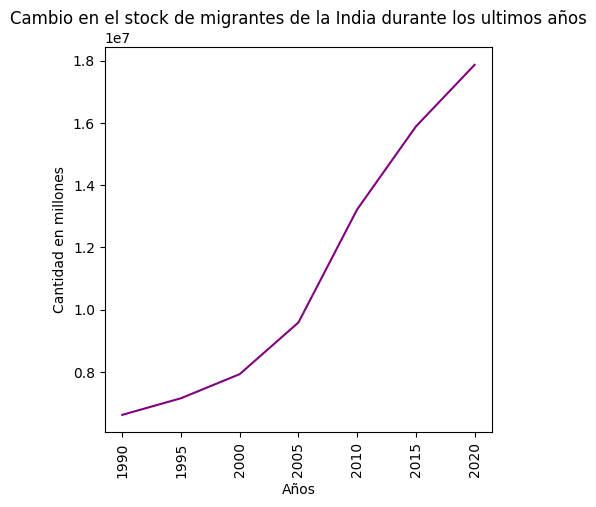

In [42]:
#ploteamos el flujo de inmigrantes provenientes de la India
fig, ax = plt.subplots(figsize=(5,5))

india = filtro_regiones2.loc[filtro_regiones2['Region, development group, country or area'] == 'india', '1990':'2020']
ax.plot(india.values[0], color='purple')
ax.set_title('Cambio en el stock de migrantes de la India durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

In [43]:
india

,1990,1995,2000,2005,2010,2015,2020
86,6619431,7153439,7928051,9588533,13221963,15885657,17869492


C:\Users\USER\AppData\Local\Temp\ipykernel_17304\326886660.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


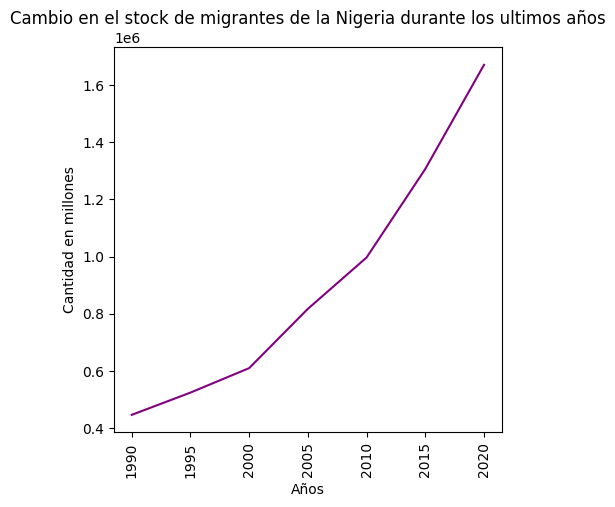

In [47]:
#ploteo para el flujo de inmigrantes provenientes de Nigeria
fig, ax = plt.subplots(figsize=(5,5))

nigeria = filtro_regiones2.loc[filtro_regiones2['Region, development group, country or area'] == 'nigeria', '1990':'2020']
ax.plot(nigeria.values[0], color='purple')
ax.set_title('Cambio en el stock de migrantes de la Nigeria durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\3691501684.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


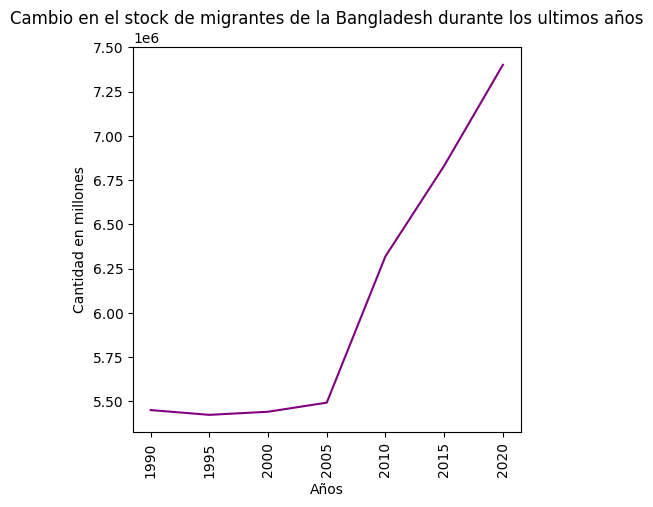

In [46]:
#Ploteo del flujo de inmigrantes provenientes de Mali Bangladesh
fig, ax = plt.subplots(figsize=(5,5))

bangladesh = filtro_regiones2.loc[filtro_regiones2['Region, development group, country or area'] == 'bangladesh', '1990':'2020']
ax.plot(bangladesh.values[0], color='purple')
ax.set_title('Cambio en el stock de migrantes de la Bangladesh durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\3014364574.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


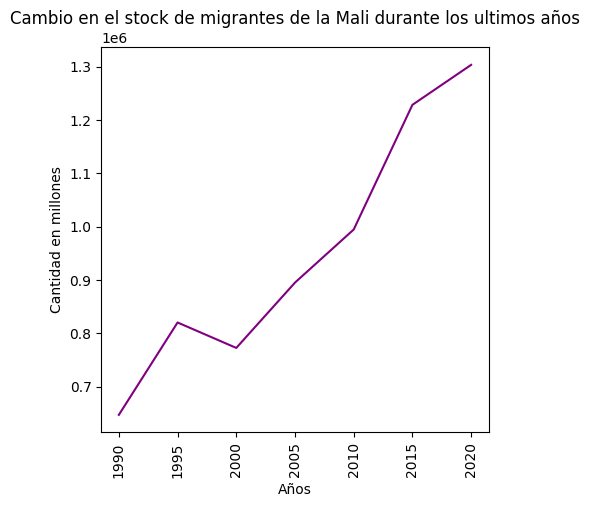

In [49]:
#ploteo para el flujo de inmigrantes provenientes de Mali
fig, ax = plt.subplots(figsize=(5,5))

mali = filtro_regiones2.loc[filtro_regiones2['Region, development group, country or area'] == 'mali', '1990':'2020']
ax.plot(mali.values[0], color='purple')
ax.set_title('Cambio en el stock de migrantes de la Mali durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\1220925452.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


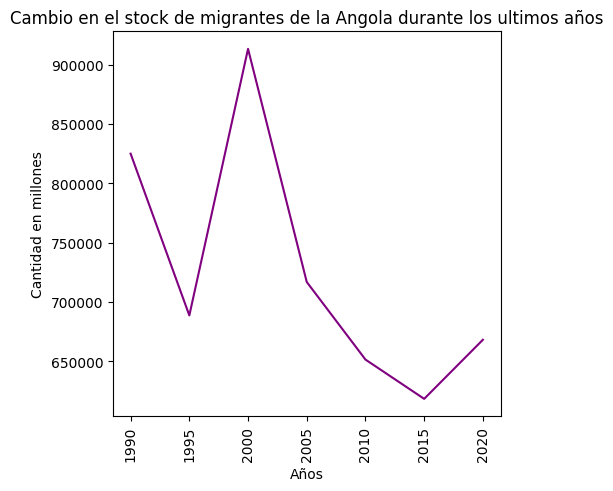

In [50]:
#Ploteamos para el flujo de inmigrantes provenientes de Angola
fig, ax = plt.subplots(figsize=(5,5))

angola = filtro_regiones2.loc[filtro_regiones2['Region, development group, country or area'] == 'angola', '1990':'2020']
ax.plot(angola.values[0], color='purple')
ax.set_title('Cambio en el stock de migrantes de la Angola durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17304\3846838004.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1985, 2021, 5), rotation=90)


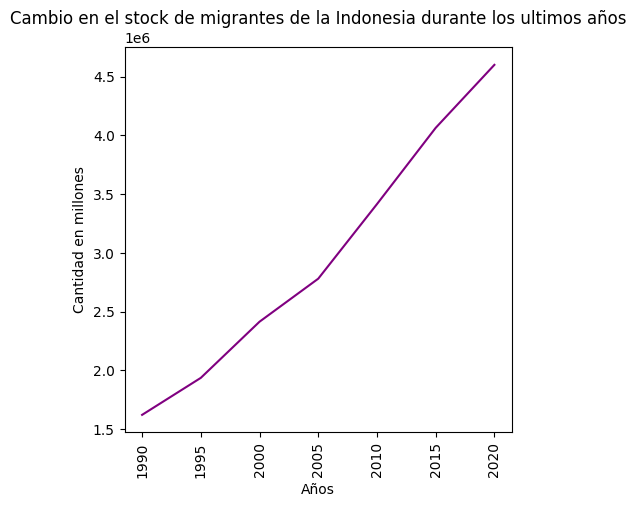

In [51]:
#ploteamos el flujo de inmigrantes provenientes de de Indonesia
fig, ax = plt.subplots(figsize=(5,5))

indonesia = filtro_regiones2.loc[filtro_regiones2['Region, development group, country or area'] == 'indonesia', '1990':'2020']
ax.plot(indonesia.values[0], color='purple')
ax.set_title('Cambio en el stock de migrantes de la Indonesia durante los ultimos años')
ax.set_xticklabels(range(1985, 2021, 5), rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad en millones')
plt.show()